In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
from scipy.stats import norm
from scipy import special
import numpy as np

x = np.linspace(20,150,20)
print('x',x)

x [ 20.          26.84210526  33.68421053  40.52631579  47.36842105
  54.21052632  61.05263158  67.89473684  74.73684211  81.57894737
  88.42105263  95.26315789 102.10526316 108.94736842 115.78947368
 122.63157895 129.47368421 136.31578947 143.15789474 150.        ]


In [5]:
# Calculating the Extreme Value Distribution Gumbel-PDF
extreme_average = 80
standard_dev_extreme = 45
beta_hat = 45*np.sqrt(6)/np.pi
chi_hat = 80 - 0.57721*beta_hat
zeta_transform = (x-chi_hat)/beta_hat

print('beta_hat: ',beta_hat)
print('chi_hat: ',chi_hat)
print('zeta_transform: ',zeta_transform)


beta_hat:  35.086356055515424
chi_hat:  59.74780442119594
zeta_transform:  [-1.13285644 -0.93784886 -0.74284129 -0.54783371 -0.35282613 -0.15781856
  0.03718902  0.2321966   0.42720417  0.62221175  0.81721932  1.0122269
  1.20723448  1.40224205  1.59724963  1.79225721  1.98726478  2.18227236
  2.37727994  2.57228751]


In [6]:
# Gumbel PDF: 1/beta exp(-exp(zeta)-zeta)

Gumbel_pdf = 1/beta_hat*np.exp(-np.exp(zeta_transform)-zeta_transform)

print('Gumbel PDF: ', Gumbel_pdf)

Gumbel PDF:  [6.41155890e-02 4.92211186e-02 3.72266166e-02 2.76486153e-02
 2.00869373e-02 1.42073122e-02 9.72660329e-03 6.40051632e-03
 4.01393939e-03 2.37426311e-03 1.30803830e-03 6.60997004e-04
 3.00738288e-04 1.20440279e-04 4.13065100e-05 1.17335685e-05
 2.65085412e-06 4.53388795e-07 5.52915878e-08 4.47013711e-09]


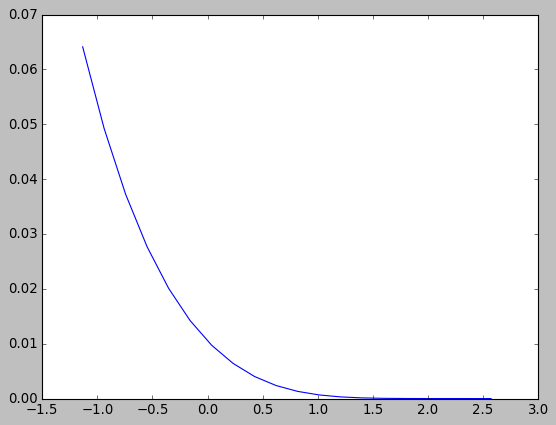

In [16]:
plt.plot(zeta_transform,Gumbel_pdf)

In [9]:
# Gumbel CDF:  exp(-exp(-zeta))

Gumbel_cdf = np.exp(-np.exp(-zeta_transform))

print('Gumbel CDF: ', Gumbel_cdf)

Gumbel CDF:  [0.04484641 0.07773261 0.12222409 0.17737266 0.24096979 0.31007108
 0.38155739 0.45258022 0.52083064 0.58464178 0.64296946 0.69530213
 0.74154229 0.78188727 0.81672522 0.84655193 0.87190934 0.89334275
 0.91137333 0.92648199]


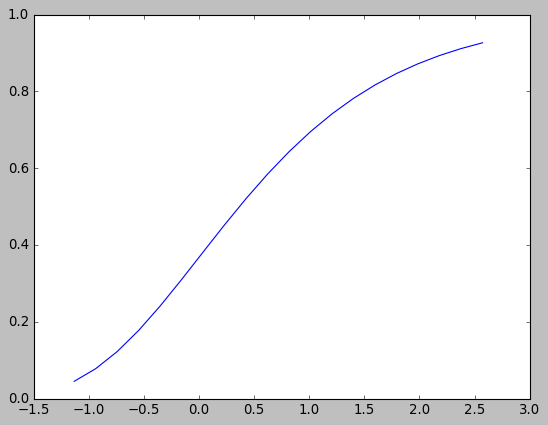

In [15]:
plt.plot(zeta_transform,Gumbel_cdf)

In [12]:
#Snow depth exceeding one year out of 100:
# Percentile of CDF = 0.99

x_percentile = chi_hat - beta_hat*np.log(-np.log(0.99))

print('x_extreme with P < 0.01:',x_percentile)


x_extreme with P < 0.01: 221.15027810038293


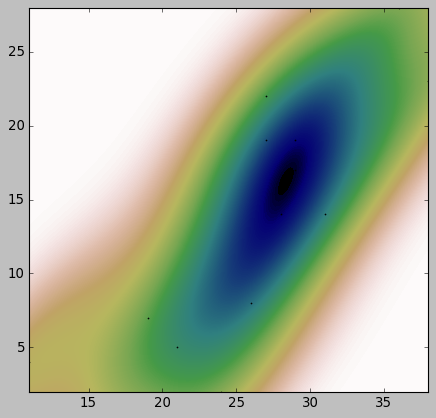

In [32]:
# Aufgabe 4.11
# Bivariate of Canadunga Max and Min Temperatures

#https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?highlight=bivariate%20norm#multivariate-estimation

from scipy import stats

def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1 = np.array([36,29,27,29,27,24,11,21,19,26,28,31,38]) # Canandaigua T max
m2 = np.array([28,19,19,17,22,2,4,5,7,8,14,14,23]) # T min
#m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
#Then we apply the KDE to the data:


X, Y = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel.evaluate(positions).T, X.shape)

#Finally, we plot the estimated bivariate distribution as a colormap and plot the individual data points on top.


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()


In [33]:
from scipy.stats import multiscale_graphcorr
#Let’s use a custom plotting function to plot the data relationship:


def mgc_plot(x, y, sim_name, mgc_dict=None, only_viz=False,
             only_mgc=False):
    """Plot sim and MGC-plot"""
    if not only_mgc:
        # simulation
        plt.figure(figsize=(8, 8))
        ax = plt.gca()
        ax.set_title(sim_name + " Simulation", fontsize=20)
        ax.scatter(x, y)
        ax.set_xlabel('T_max @ Canandaigua', fontsize=15)
        ax.set_ylabel('T_min @ Canandaigua', fontsize=15)
        ax.axis('equal')
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        plt.show()
    if not only_viz:
        # local correlation map
        plt.figure(figsize=(8,8))
        ax = plt.gca()
        mgc_map = mgc_dict["mgc_map"]
        # draw heatmap
        ax.set_title("Local Correlation Map", fontsize=20)
        im = ax.imshow(mgc_map, cmap='YlGnBu')
        # colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("", rotation=-90, va="bottom")
        ax.invert_yaxis()
        # Turn spines off and create white grid.
        for edge, spine in ax.spines.items():
            spine.set_visible(False)
        # optimal scale
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1],
                   marker='X', s=200, color='red')
        # other formatting
        ax.tick_params(bottom="off", left="off")
        ax.set_xlabel('#Neighbors for T_max @ Canandaigua', fontsize=15)
        ax.set_ylabel('#Neighbors for T_min @ Canandaigua', fontsize=15)
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        ax.set_xlim(0, 15)
        ax.set_ylim(0, 15)
        plt.show()
        


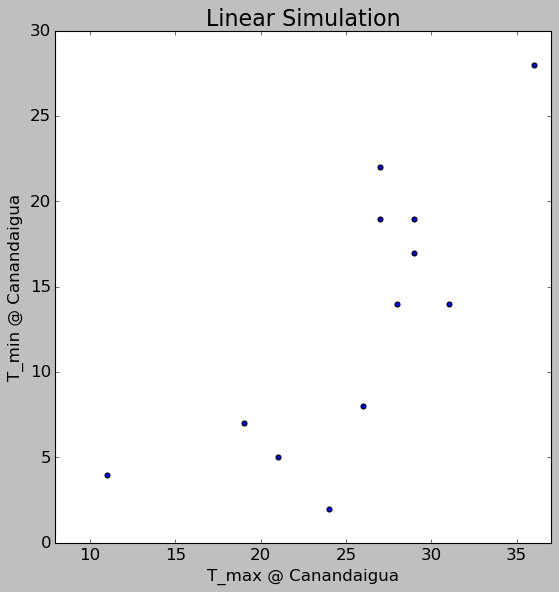

In [18]:
mgc_plot(m1, m2, "Linear", only_viz=True)

MGC test statistic:  0.631
P-value:  0.003


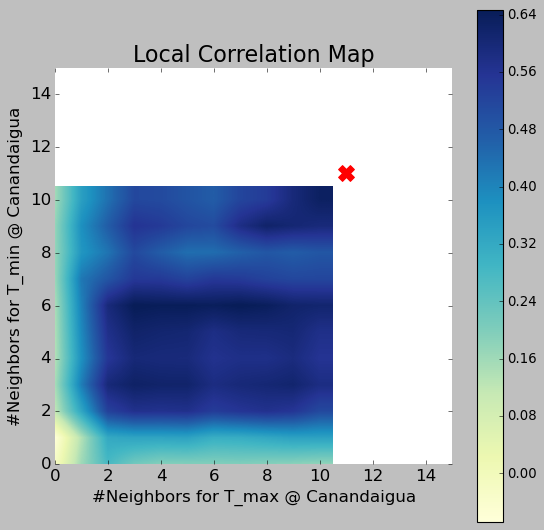

In [34]:
#Now, we can see the test statistic, p-value, and MGC map visualized below. 
#The optimal scale is shown on the map as a red “x”:

stat, pvalue, mgc_dict = multiscale_graphcorr(m1, m2)

print("MGC test statistic: ", round(stat, 3))
#MGC test statistic:  1.0
print("P-value: ", round(pvalue, 3))
#P-value:  0.0
mgc_plot(m1, m2, "Linear", mgc_dict, only_mgc=True)